In [6]:
import pandas as pd

# Load datasets with 'latin-1' encoding
zomato_data = pd.read_csv('zomato.csv', encoding='latin-1')
country_code = pd.read_csv('country_code.csv', encoding='latin-1')

# Check columns and first few rows to understand the data
print(zomato_data.columns)
print(zomato_data.head())


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chin

In [9]:
# Select relevant columns for prediction
selected_columns = ['Average Cost for two', 'Price range', 'Cuisines', 'Aggregate rating', 'Votes', 'City']

# Drop rows with missing values in selected columns
zomato_data = zomato_data[selected_columns].dropna()

# Encode categorical variables (Cuisines and Country name) using dummy variables
encoded_data = pd.get_dummies(zomato_data, columns=['Cuisines', 'City'])

# Separate features (X) and target variables (y)
X = encoded_data.drop(['Average Cost for two', 'Price range'], axis=1)
y_avg_cost = encoded_data['Average Cost for two']
y_price_range = encoded_data['Price range']


In [10]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train_avg_cost, y_test_avg_cost = train_test_split(X, y_avg_cost, test_size=0.2, random_state=42)
X_train, X_test, y_train_price_range, y_test_price_range = train_test_split(X, y_price_range, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train the model
model_avg_cost = LinearRegression()
model_avg_cost.fit(X_train, y_train_avg_cost)

# Predict on test set
y_pred_avg_cost = model_avg_cost.predict(X_test)

# Evaluate model
mse_avg_cost = mean_squared_error(y_test_avg_cost, y_pred_avg_cost)
print(f'Mean Squared Error (Average Cost): {mse_avg_cost}')


Mean Squared Error (Average Cost): 1.871825134783535e+23


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
tolerance = 16
def calculate_accuracy(y_true, y_pred, tolerance):
    return np.mean(np.abs(y_true - y_pred) <= tolerance)

# Initialize and train the model
model_price_range = RandomForestClassifier(random_state=42)
model_price_range.fit(X_train, y_train_price_range)

# Predict on test set
y_pred_price_range = model_price_range.predict(X_test)

# Evaluate model
accuracy_price_range = calculate_accuracy(y_test_price_range, y_pred_price_range, tolerance)
print(f'Accuracy Score (Price Range): {accuracy_price_range}')


Accuracy Score (Price Range): 1.0


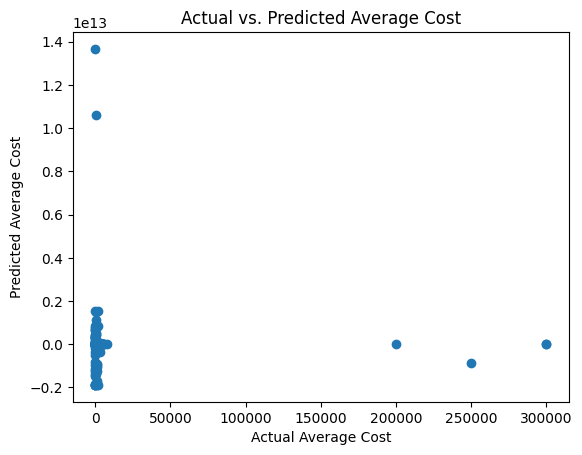

In [13]:
import matplotlib.pyplot as plt

# Example visualization (scatter plot of predicted vs. actual for Average Cost)
plt.scatter(y_test_avg_cost, y_pred_avg_cost)
plt.xlabel('Actual Average Cost')
plt.ylabel('Predicted Average Cost')
plt.title('Actual vs. Predicted Average Cost')
plt.show()
